In [11]:
import numpy as np
import matplotlib.pyplot as plt

作业11

假设在红移为1处去观测一个现在红移为2的星系，其红移为多少？

In [2]:
z1 = 1
z2 = 2

a1 = 1/(z1+1)
a2 = 1/(z2+1)

a_new = a2/a1
z_new = 1/a_new-1

print('红移为:',z_new)

红移为: 0.5


假设宇宙的膨胀是一个线性过程，请根据今天的哈勃常数估算宇宙的年龄。

In [ ]:
H_z = 70/3.086/1e19 #s

#a正比t

#a = t

#a的导数为常数
a_dot = 1
#哈勃常数正比于1/t

#H_z = 1/a
#H_z = 1/t

t = 1/H_z/3.15/1e7/1e9#Gyr
print(t)
print(H_z)
print('宇宙年龄为: {:.4f} Gyr'.format(t))


13.995464852607707
2.2683084899546342e-18
宇宙年龄为: 13.9955 Gyr


作业12

一团1000个太阳质量的中性气体云（全部为H原子）, 温度为30K，当云的密度大于多少时，气体云将发生塌缩？塌缩（自由下落）时标为多少？

• 云塌缩：势能 > 热能

In [27]:
#Jeans质量
#M = 30*((T/10)**(3/2))*((100/n)**(1/2))
#T = 30

#1000 = 30*3**(3/2)*((100/n)**(1/2))

#(100/n)**(1/2) = 1000/30/(3**(3/2))
#100/n = (1000/30/(3**(3/2)))**2

#数密度
n = 100/((1000/30/(3**(3/2)))**2) #cm-3
#坍缩时间
rou = n*3.32*1e-24 #cm-3 g
G = 6.67*1e-8 #cm3 g-3 s-2
t = np.sqrt(3*np.pi/32/G/rou)/3.15/1e7/1e9

print('数密度: {:.4f} cm-3'.format(n))
print('下落时间为: {:.4f} Gyr'.format(t))

数密度: 2.4300 cm-3
下落时间为: 0.0235 Gyr


这团气体中能形成的最大质量的恒星的质量是多少？

假设分子云中的恒星形成遵循Salpter初始质量函数（最小质量的恒星为0.08太阳质量）

In [40]:
#取不同alpha时http://cluster.shao.ac.cn/~shen/Lecture/IMF.pdf的（3）式有不同的指数形式

#0.08~0.5的质量 alpha = 1.3

#M_1 = k2/0.3*((0.08**(-0.3))-(0.5**(-0.3)))
#M_1 = 3*k2  #1式

#0.5~最大质量的质量 alpha = 2.3

#M_2 = k2/1.3*((M_max**(-1.3))-(0.5**(-1.3))) #2式

#M_1+M_2 = 1000 #M_sun 3式

#1式除2式 带入3式

#1000/M2-1 = 3.9/((0.5**(-1.3))-(M_max**(-1.3))
                 
#假设小质量星占25%,则M2 = 750
#可得
M_max = 7.7 #M_sun

print('在小质量星（m<0.5）总质量占比25%的情况下最大质量为{:.1f} M_sun'.format(M_max))

在小质量星（m<0.5）总质量占比25%的情况下最大质量为7.7 M_sun


#思路挺好，差一点
#Mtot(M>M*)/Mtot(M<M*)v= M*/(1000-M*)

太阳中的氢大概有10%在主序阶段被燃烧，请估算太阳处于主序阶段的时间？太阳表面的温度大概是~5500K，请由此估算地球表面的温度。

In [20]:
#由经验公式
#np.log10(t) = 1.015-3.49*np.log10(M)+0.83*[np.log10(M)]**2
M = 1#M_sun
t = 10**(1.015-3.49*np.log10(M)+0.83*(np.log10(M))**2)
print('太阳在主序的时间为{:.4f} Gyr'.format(t))

M_sun = 2*1e30 #kg
R_sun = 7*1e8 #m
T = 5500 #K
c = 3*1e8 #m/s
sigma = 5.67*1e-8 #W m-2 K-4
M_delta = M_sun*0.1
E = M_delta*c*c
L = 4*np.pi*R_sun*R_sun*sigma*(T**4)
t = E/L/3.15/1e7/1e9
print('太阳在主序的时间为{:.4f} Gyr'.format(t))
#不能用E=mc2和Stefan公式算辐射时间吗..算出来的大了两个量级..没想明白..

D = 1.5*1e11 #m 1AU
T_earth = 0.5*(0.7*L/sigma/np.pi/D/D)**(1/4)-273
print('地球位置的温度为：{:.2f} 摄氏度'.format(T_earth))

太阳在主序的时间为10.3514 Gyr
太阳在主序的时间为1788.6369 Gyr
地球位置的温度为：-29.99 摄氏度


###DeltaM 没有那么多，4个质子到一个He核；
### 地球的温度只需要知道太阳的视半径就可以

一个星系的恒星形成历史可以用exp(-t/τ)来描述（其中τ=3Gyr），该星系的年龄为10Gyr，请计算该星系的V波段的恒星质光比（随着时间的演化）。

Text(0, 0.5, 'M/Lv')

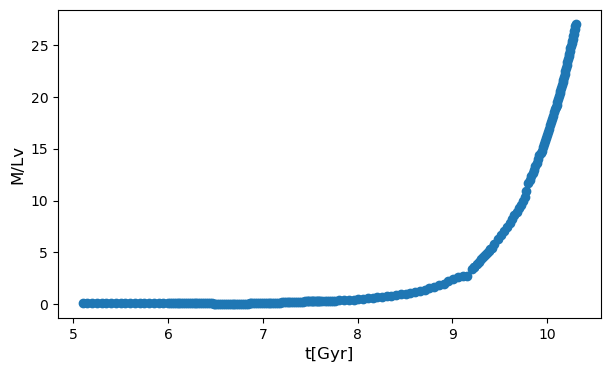

In [18]:
data = np.loadtxt('bc2003_hr_m162_salp_ssp.4color.txt',skiprows=29)
t = data[:,0] #Gyr
Lv = 1/data[:,5] #V波段光度

#从0到t积分
M_t = 3*(1-np.exp(-t/3))

M_L_ratio = M_t/Lv

plt.figure(dpi=100,figsize=(7,4))
plt.scatter(t,M_L_ratio)
plt.xlabel('t[Gyr]',size=12)
plt.ylabel('M/Lv',size=12)

In [ ]:
### 这个文件的各列的意思理解不到位